# Predicting Handwritten Digits Using Neural Network

This project will load some handwritten digits, and use a neural network machine learning model to classify the value of the handwritten digit image.

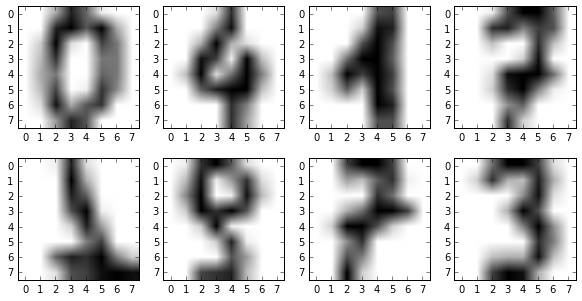

In [94]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline

# create the handwritten digit images (represented as rows in a dataset)
# each row is one digit with each column being a grayscale value
numbers_arr = load_digits()
numbers = pd.DataFrame(numbers_arr['data'])

# the digits must be reshaped to 8 rows by 8 columns to view each image
digit_indexes = [0, 100, 200, 300, 1000, 1100, 1200, 1300]

# plot the digits
fig = plt.figure(figsize=(10, 5))
y = 1

for i in digit_indexes:
    ax = fig.add_subplot(2, 4, y)
    digit = numbers.iloc[i]
    final_digit = digit.values.reshape(8, 8)
    ax.imshow(final_digit, cmap='gray_r')
    y += 1

### K-Nearest Neighbor Predictions

The code below implements the K-Nearest Neighbor algorithm to attempt to classify the digit images. The accuracy of the predictions will be analyzed against the accuracy of the Neural Network predictions.

In [97]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# read the target column values into a Series
target = pd.Series(numbers_arr['target'])

# split data into test and training sets
eighty_pct = round(len(numbers) * 0.8)
train_features = numbers[:eighty_pct]
test_features = numbers[eighty_pct:]
train_targets = target[:eighty_pct]
test_targets = target[eighty_pct:]

# train a KNN model
knn = KNeighborsRegressor()
knn.fit(train_features, train_targets)

# make predictions
knn_predictions = knn.predict(test_features)
# round predictions to integers
knn_predictions = np.round(knn_predictions)

# calculate Root Mean Squared Error
rmse = sqrt(mean_squared_error(test_targets, knn_predictions))
print('RMSE of KNN Model with 5 Neighbors:', rmse)

RMSE of KNN Model with 5 Neighbors: 0.8640127926423209


 ## Neural Network
 
The KNN algorithm performed extremely well, with a RMSE of only 0.86. The code below will implement several neural network models, each with a different number of hidden layers and neurons for each layer.

In [98]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

# train Neural Network models with varying neurons and 1 hidden layer   
rmse_vals = {}
neurons = [8, 16, 32]

for n in neurons:
    train_test_errors = []
    
    # fit and train Neural Network models
    nn = MLPClassifier(hidden_layer_sizes=(n,))
    nn.fit(train_features, train_targets)
    test_predictions = nn.predict(test_features)
    train_predictions = nn.predict(train_features)
    test_rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
    train_rmse = np.sqrt(mean_squared_error(train_targets, train_predictions))
    train_test_errors.append(train_rmse)
    train_test_errors.append(test_rmse)
    rmse_vals[n] = train_test_errors

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



In [99]:
# verify the RMSE per neuron count
print(rmse_vals)

{8: [0.9515378081180822, 2.0111111966088173], 16: [0.18459443196246147, 1.2721573806389703], 32: [0.0, 1.4220703648422865]}


### Single Layer Analysis

As shown above, the RMSE for the training sets were 0 when the Neural Network used 16 and 32 neurons for the hidden layer. The RMSE for the test sets was higher for every count of neurons used, which means there may be some overfitting. Overall, the single hidden layer network with 32 neurons performed the best out of these 3.

In [100]:
# train neural networks with 2 hidden layers

train_test_errors_two_layers = []

# fit and train Neural Network models
nn_two = MLPClassifier(hidden_layer_sizes=(64,64))
nn_two.fit(train_features, train_targets)
test_predictions_two = nn_two.predict(test_features)
train_predictions_two = nn_two.predict(train_features)
test_rmse_two = np.sqrt(mean_squared_error(test_targets, test_predictions_two))
train_rmse_two = np.sqrt(mean_squared_error(train_targets, train_predictions_two))
train_test_errors_two_layers.append(train_rmse_two)
train_test_errors_two_layers.append(test_rmse_two)

# verify the output
print(train_test_errors_two_layers)

[0.0, 1.204679825469884]


In [104]:
# train several models with 3 hidden layers
rmse_vals_three = {}
n_neurons = [10, 64, 128]

for ne in n_neurons:
    train_test_errors_three = []
    
    # fit and train Neural Network models
    nn_three = MLPClassifier(hidden_layer_sizes=(ne,ne,ne))
    nn_three.fit(train_features, train_targets)
    test_predictions_three = nn_three.predict(test_features)
    train_predictions_three = nn_three.predict(train_features)
    test_rmse_three = np.sqrt(mean_squared_error(test_targets, test_predictions_three))
    train_rmse_three = np.sqrt(mean_squared_error(train_targets, train_predictions_three))
    train_test_errors_three.append(train_rmse_three)
    train_test_errors_three.append(test_rmse_three)
    rmse_vals_three[ne] = train_test_errors_three
    
# verify the train and test RMSEs per neuron count
print(rmse_vals_three)

{64: [0.0, 1.2743450991606922], 128: [0.0, 1.1706722588344087], 10: [0.542363857153657, 1.5692021995827967]}


### Multiple Layer Analysis

As shown above, the lowest RMSE for 3 hidden layers (on the test set) was 1.17, which had 128 neurons per layer. This lower than the two layer model with 64 neurons per layer. Per these results, the KNN algorithm actually performed better (had a lower RMSE) than any of the Neural Network models.